In [13]:
# imports
import json
import pandas as pd
import pickle
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# file import for slot term weights
with open('1710576018_Hunsmann_slot_termweights.pkl', 'rb') as f:
    slot_termweights = pickle.load(f)
    
# file import for cluster vocabularies
with open('1710576018_Hunsmann_cluster_vocabularies.pkl', 'rb') as f:
    cluster_vocabs = pickle.load(f)


# file import for headline Tweets
with open('1710576018_Hunsmann_results_headlines.pkl', 'rb') as f:
    results_headlines = pickle.load(f)
    
f.close()

# sort by timestamp
results_headlines = results_headlines.sort_values('ts', ascending=True)

# setting view options
pd.set_option('display.max_colwidth', -1)

# view headline Tweet results
results_headlines

,idx,day,ts,text,type,slot,cdex
0,2,0,2013-05-28 00:01:49,ağaçları kesmeye devam et gün hepimiz oksijen yetmezliğinden gidicez demedi demeyin gezi parkı gidici,e,0,0
2,4,0,2013-05-28 00:03:33,doga icin sergi yaptiniz ayni duyarliligi gosterin mehmet turgut taksim gezi parkina avm dikmek talan ettiler,e,0,1
4,62,0,2013-05-28 01:00:31,binlerce imza boşa sayıldı gezi parkı insanların naparsak yapalım inadım inat kör murat diyorlar,e,1,2
6,113,0,2013-05-28 02:07:15,taksim gezi parkı na dozer girdi halk engelledi parkta nöbet başladı,e,2,3
8,193,0,2013-05-28 04:00:20,leyla mecnun gezi parkı …,e,4,4
5,1469,0,2013-05-28 10:04:41,gezi parkı nöbet tutanlara gaz …,r,10,2
1,1490,0,2013-05-28 10:07:26,yaradılanı yaradandan seviyorsanız gezi parkı ndaki ağaçları kesiyorsunuz yetmedi avm ler gezi parkı,r,10,0
9,1876,0,2013-05-28 11:02:11,taksim gezi parkı ağaçlar çatır çatır söküldü i̇stanbul topçu kışlası planlanan gezi pa,r,11,4
10,4314,0,2013-05-28 16:17:34,"adı üstünde ""gezi"" parkı millet avere avere gezeceğine gitsin çalışsın avm gidip alış veriş yapsın",e,16,5
11,4314,0,2013-05-28 16:17:34,"adı üstünde ""gezi"" parkı millet avere avere gezeceğine gitsin çalışsın avm gidip alış veriş yapsın",r,16,5


In [24]:
# Enter day index
events_df = results_headlines[results_headlines['day']==0]

# word cloud generating function
def cloudmaker(ci, s):
    out = {}
    weighted = slot_termweights[s]
    cvoc = cluster_vocabs[ci]
    for word in cvoc:
        if word in weighted:
            v = weighted.get(word)
            out.update({word : v})
    dictWords = out
    wordcloud = WordCloud(width=1200,height=600, background_color="white").generate_from_frequencies(dictWords)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    base = events_df[events_df['slot']==s]
    t = base.ts.iloc[0]
    print("     Cluster", ci,"at time", t)
    plt.show()

# view headlines from the selected day
events_df

,idx,day,ts,text,type,slot,cdex
0,2,0,2013-05-28 00:01:49,ağaçları kesmeye devam et gün hepimiz oksijen yetmezliğinden gidicez demedi demeyin gezi parkı gidici,e,0,0
2,4,0,2013-05-28 00:03:33,doga icin sergi yaptiniz ayni duyarliligi gosterin mehmet turgut taksim gezi parkina avm dikmek talan ettiler,e,0,1
4,62,0,2013-05-28 01:00:31,binlerce imza boşa sayıldı gezi parkı insanların naparsak yapalım inadım inat kör murat diyorlar,e,1,2
6,113,0,2013-05-28 02:07:15,taksim gezi parkı na dozer girdi halk engelledi parkta nöbet başladı,e,2,3
8,193,0,2013-05-28 04:00:20,leyla mecnun gezi parkı …,e,4,4
5,1469,0,2013-05-28 10:04:41,gezi parkı nöbet tutanlara gaz …,r,10,2
1,1490,0,2013-05-28 10:07:26,yaradılanı yaradandan seviyorsanız gezi parkı ndaki ağaçları kesiyorsunuz yetmedi avm ler gezi parkı,r,10,0
9,1876,0,2013-05-28 11:02:11,taksim gezi parkı ağaçlar çatır çatır söküldü i̇stanbul topçu kışlası planlanan gezi pa,r,11,4
10,4314,0,2013-05-28 16:17:34,"adı üstünde ""gezi"" parkı millet avere avere gezeceğine gitsin çalışsın avm gidip alış veriş yapsın",e,16,5
11,4314,0,2013-05-28 16:17:34,"adı üstünde ""gezi"" parkı millet avere avere gezeceğine gitsin çalışsın avm gidip alış veriş yapsın",r,16,5


     Cluster 0 at time 2013-05-28 00:01:49


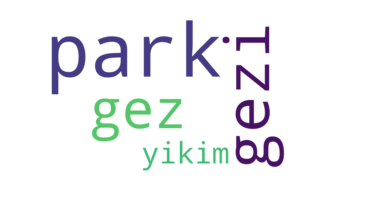

     Cluster 1 at time 2013-05-28 00:01:49


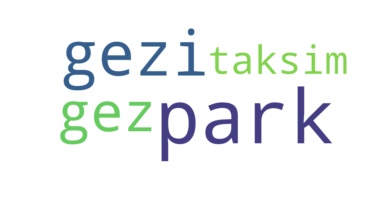

     Cluster 2 at time 2013-05-28 01:00:31


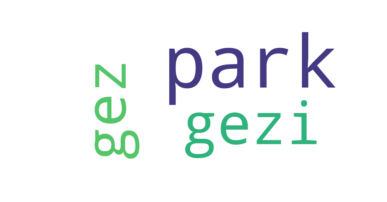

     Cluster 3 at time 2013-05-28 02:07:15


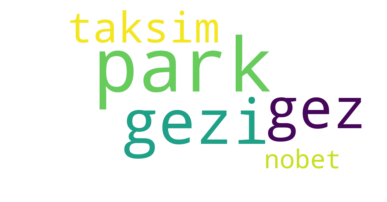

     Cluster 4 at time 2013-05-28 04:00:20


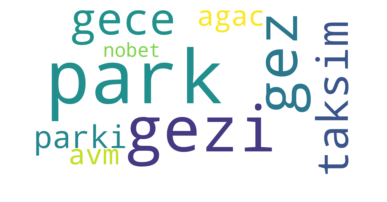

     Cluster 2 at time 2013-05-28 10:04:41


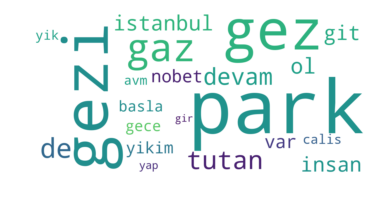

     Cluster 0 at time 2013-05-28 10:04:41


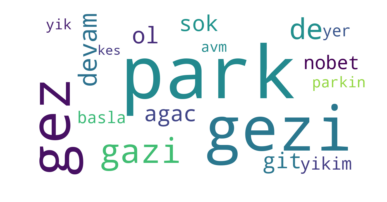

     Cluster 4 at time 2013-05-28 11:02:11


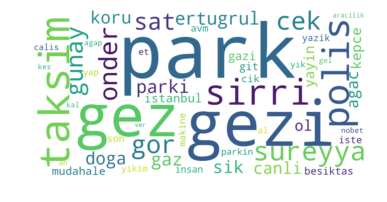

     Cluster 5 at time 2013-05-28 16:17:34


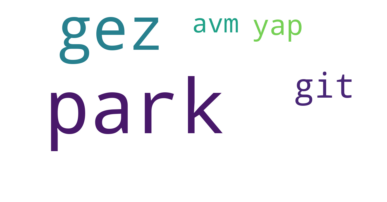

     Cluster 5 at time 2013-05-28 16:17:34


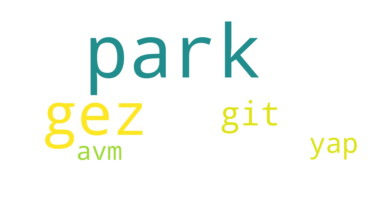

     Cluster 6 at time 2013-05-28 19:00:56


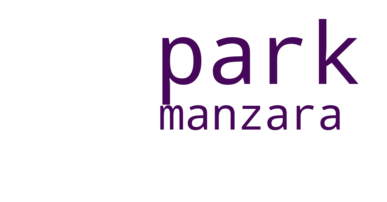

     Cluster 6 at time 2013-05-28 19:00:56


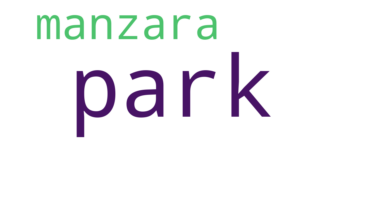

     Cluster 3 at time 2013-05-28 20:01:28


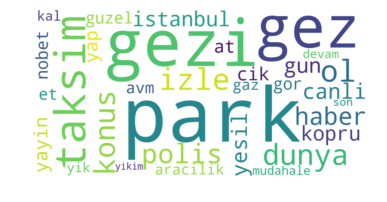

     Cluster 7 at time 2013-05-28 20:01:28


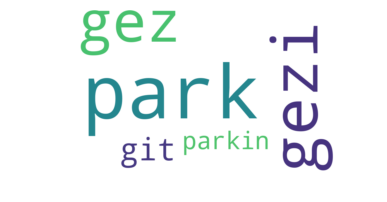

     Cluster 7 at time 2013-05-28 20:01:28


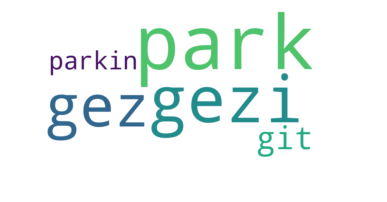

     Cluster 8 at time 2013-05-28 22:07:03


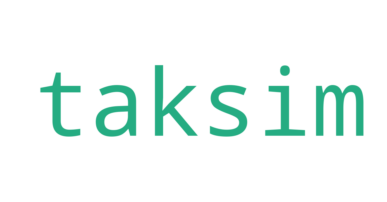

     Cluster 8 at time 2013-05-28 22:07:03


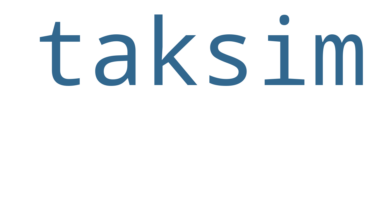

     Cluster 1 at time 2013-05-28 23:08:09


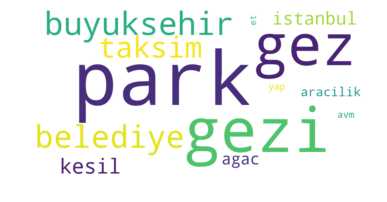

In [25]:
# show word clouds for the cluster vocabularies in the above table

slots = events_df.slot.tolist()
cdexes = events_df.cdex.tolist()
for a,b in zip(slots,cdexes):
    cloudmaker(b,a)